# Week 3: Exploratory Data Analysis (EDA)

This notebook covers:
1. Statistical analysis of datasets
2. Data visualization and patterns
3. Correlation analysis
4. Feature distribution analysis
5. Data quality assessment

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style (fixed)
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set up paths
DATA_RAW = Path('../data/raw')
DATA_PROCESSED = Path('../data/processed')
REPORTS = Path('../reports/figures')
REPORTS.mkdir(exist_ok=True)

print("✅ Libraries imported and paths set up")


✅ Libraries imported and paths set up


In [3]:
# Load all available datasets
print("📊 Loading datasets...")

# Load ingredient toxicity database
ingredient_db = pd.read_csv(DATA_PROCESSED / 'ingredient_toxicity_db.csv')
print(f"✅ Ingredient DB: {ingredient_db.shape}")

# Load Kaggle food datasets
try:
    food_df = pd.read_csv(DATA_RAW / 'food.csv')
    print(f"✅ Food dataset: {food_df.shape}")
except:
    print("⚠️ Food.csv not found")
    food_df = None

try:
    food1_df = pd.read_csv(DATA_RAW / 'food1.csv')
    print(f"✅ Food1 dataset: {food1_df.shape}")
except:
    print("⚠️ Food1.csv not found")
    food1_df = None

print("\n📋 Available datasets for analysis:")
print(f"  - Ingredient Toxicity DB: {len(ingredient_db)} ingredients")
if food_df is not None:
    print(f"  - Food Dataset: {len(food_df)} records")
if food1_df is not None:
    print(f"  - Food1 Dataset: {len(food1_df)} records")

📊 Loading datasets...
✅ Ingredient DB: (40, 7)
✅ Food dataset: (7413, 48)
✅ Food1 dataset: (7413, 48)

📋 Available datasets for analysis:
  - Ingredient Toxicity DB: 40 ingredients
  - Food Dataset: 7413 records
  - Food1 Dataset: 7413 records


In [4]:
# Detailed analysis of ingredient database
print("🔍 INGREDIENT DATABASE ANALYSIS")
print("=" * 50)

# Basic info
print("\n📊 Basic Information:")
print(f"Shape: {ingredient_db.shape}")
print(f"Columns: {list(ingredient_db.columns)}")

# Data types
print("\n🏷️ Data Types:")
print(ingredient_db.dtypes)

# Missing values
print("\n❓ Missing Values:")
missing = ingredient_db.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# Summary statistics
print("\n📈 Summary Statistics:")
ingredient_db.describe()

🔍 INGREDIENT DATABASE ANALYSIS

📊 Basic Information:
Shape: (40, 7)
Columns: ['ingredient_name', 'toxicity_score', 'category', 'health_impact', 'allergen_risk', 'is_toxic', 'risk_level']

🏷️ Data Types:
ingredient_name    object
toxicity_score      int64
category           object
health_impact      object
allergen_risk      object
is_toxic            int64
risk_level         object
dtype: object

❓ Missing Values:
risk_level    8
dtype: int64

📈 Summary Statistics:


,toxicity_score,is_toxic
count,40.000000,40.000000
mean,39.375000,0.325000
std,31.402831,0.474342
min,0.000000,0.000000
25%,16.250000,0.000000
50%,37.500000,0.000000
75%,66.250000,1.000000
max,95.000000,1.000000


In [5]:
# Categorical analysis
print("🏷️ CATEGORICAL ANALYSIS")
print("=" * 40)

categorical_cols = ['category', 'health_impact', 'risk_level', 'allergen_risk']

for col in categorical_cols:
    if col in ingredient_db.columns:
        print(f"\n📊 {col.upper()} Distribution:")
        counts = ingredient_db[col].value_counts()
        percentages = ingredient_db[col].value_counts(normalize=True) * 100
        
        for category, count in counts.items():
            pct = percentages[category]
            print(f"  {category}: {count} ({pct:.1f}%)")

🏷️ CATEGORICAL ANALYSIS

📊 CATEGORY Distribution:
  preservative: 8 (20.0%)
  thickener: 7 (17.5%)
  sweetener: 4 (10.0%)
  fat: 3 (7.5%)
  mineral: 2 (5.0%)
  vitamin: 2 (5.0%)
  leavening: 2 (5.0%)
  flavor: 2 (5.0%)
  emulsifier: 2 (5.0%)
  flour_treatment: 1 (2.5%)
  protein: 1 (2.5%)
  additive: 1 (2.5%)
  flavor_enhancer: 1 (2.5%)
  macronutrient: 1 (2.5%)
  fiber: 1 (2.5%)
  grain: 1 (2.5%)
  spice: 1 (2.5%)

📊 HEALTH_IMPACT Distribution:
  very_low: 11 (27.5%)
  beneficial: 10 (25.0%)
  high: 6 (15.0%)
  medium: 6 (15.0%)
  low: 4 (10.0%)
  very_high: 3 (7.5%)

📊 RISK_LEVEL Distribution:
  High Risk: 9 (28.1%)
  Medium Risk: 8 (25.0%)
  Low Risk: 8 (25.0%)
  Safe: 7 (21.9%)

📊 ALLERGEN_RISK Distribution:
  none: 34 (85.0%)
  corn: 3 (7.5%)
  gluten: 2 (5.0%)
  soy: 1 (2.5%)


📊 Creating visualizations...


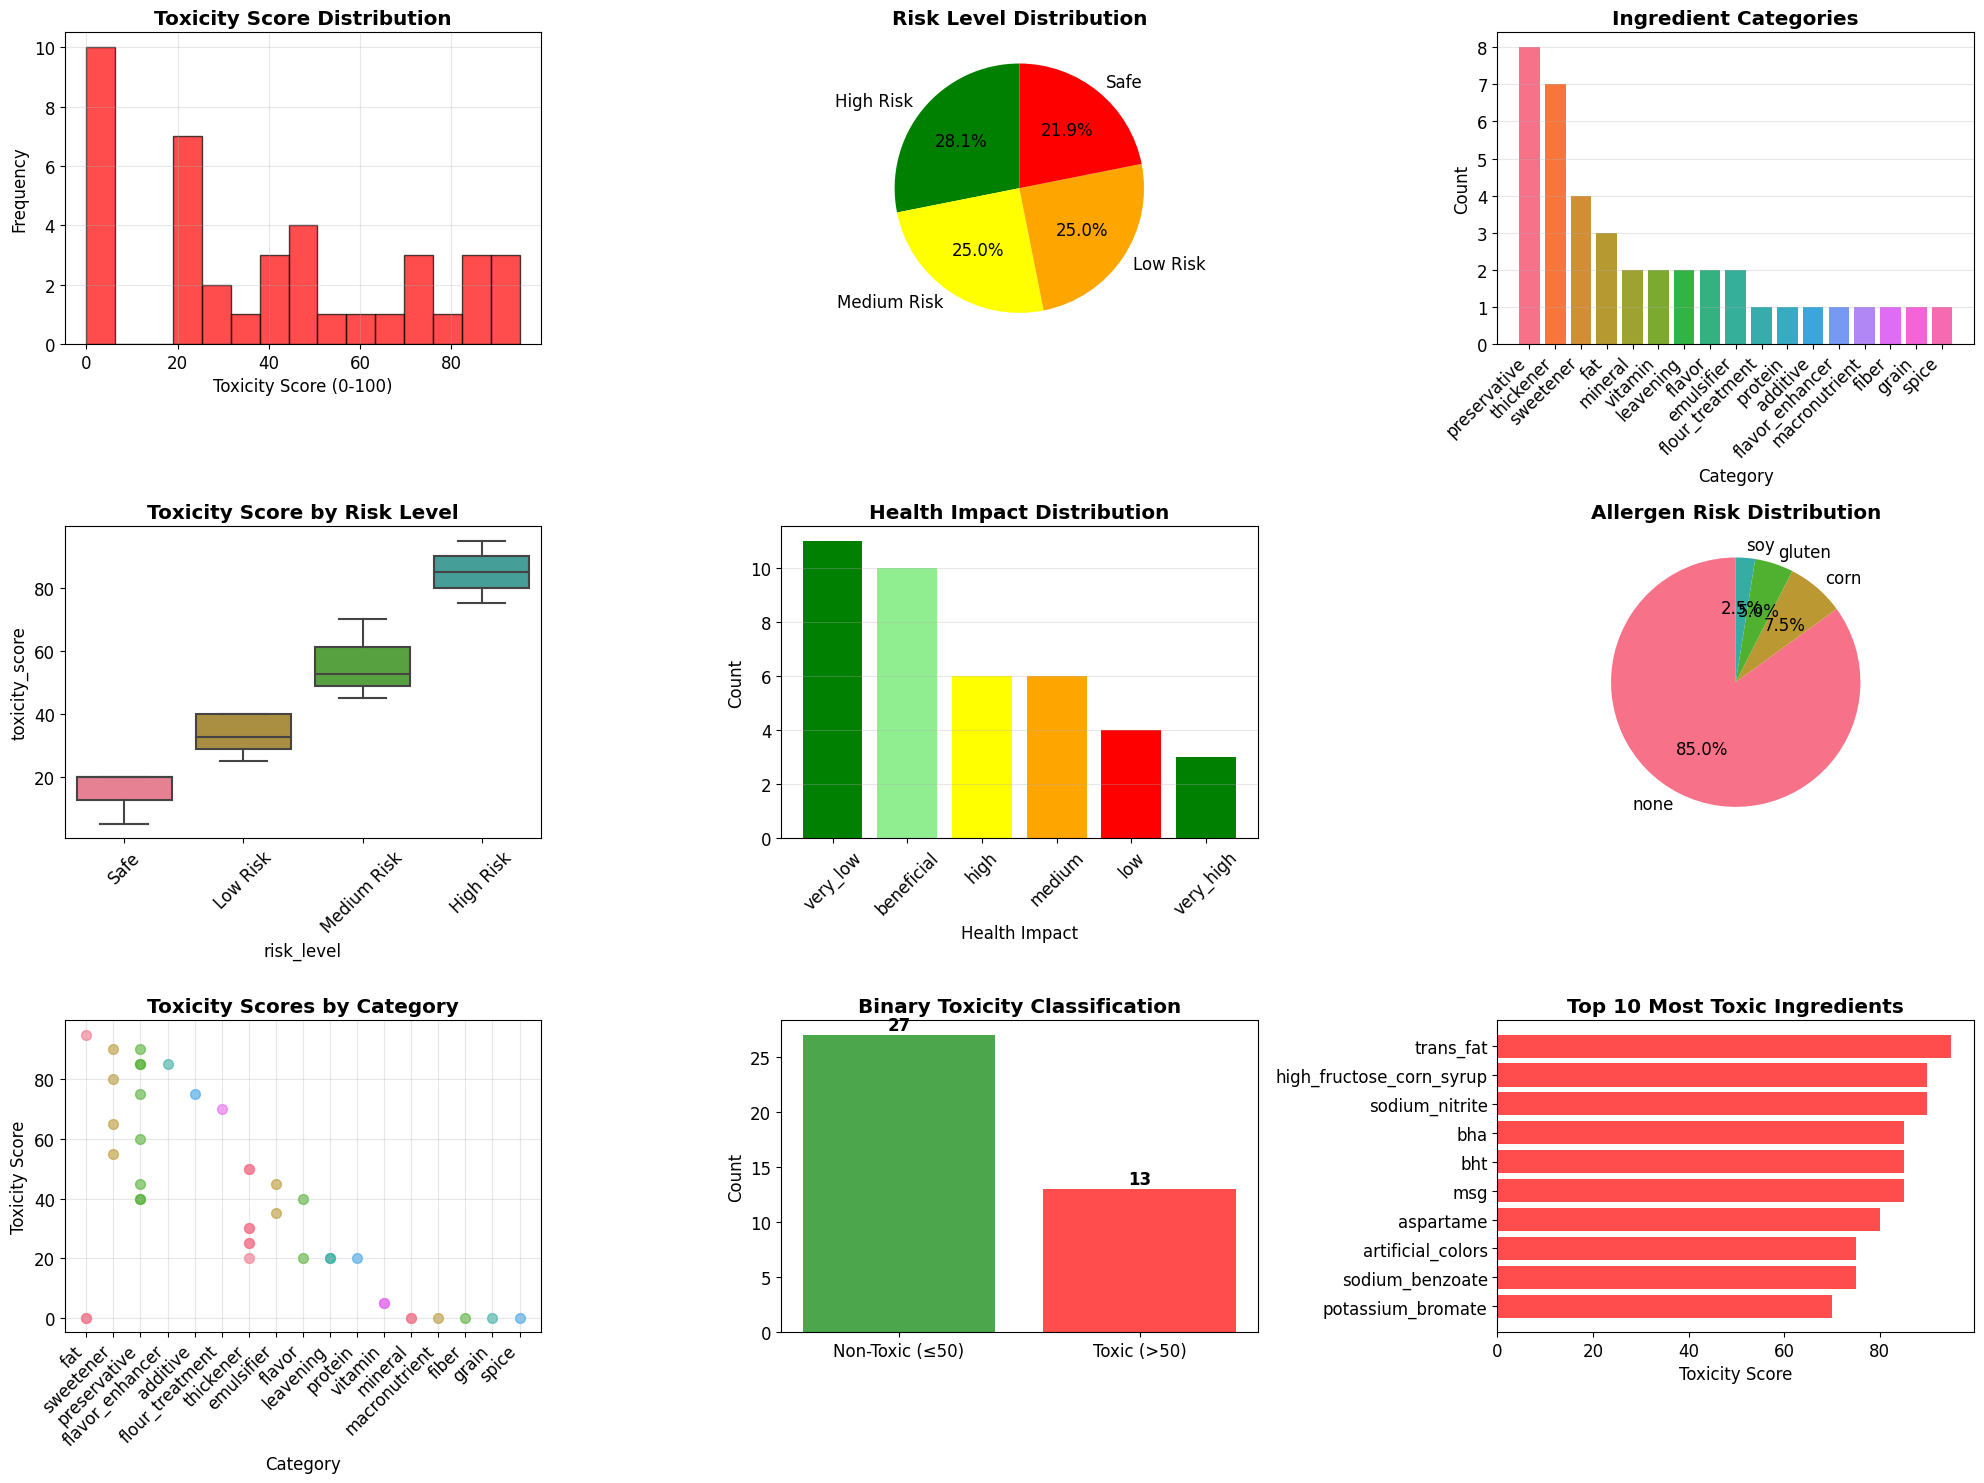

✅ Comprehensive EDA visualizations created


In [6]:
# Create comprehensive visualizations
print("📊 Creating visualizations...")

# Set up the figure with subplots
fig = plt.figure(figsize=(20, 15))

# 1. Toxicity Score Distribution
plt.subplot(3, 3, 1)
plt.hist(ingredient_db['toxicity_score'], bins=15, alpha=0.7, color='red', edgecolor='black')
plt.title('Toxicity Score Distribution', fontweight='bold')
plt.xlabel('Toxicity Score (0-100)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. Risk Level Pie Chart
plt.subplot(3, 3, 2)
risk_counts = ingredient_db['risk_level'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
        colors=colors[:len(risk_counts)], startangle=90)
plt.title('Risk Level Distribution', fontweight='bold')

# 3. Category Bar Chart
plt.subplot(3, 3, 3)
category_counts = ingredient_db['category'].value_counts()
bars = plt.bar(range(len(category_counts)), category_counts.values, 
               color=sns.color_palette("husl", len(category_counts)))
plt.title('Ingredient Categories', fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(category_counts)), category_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 4. Toxicity by Category Box Plot
plt.subplot(3, 3, 4)
sns.boxplot(data=ingredient_db, x='risk_level', y='toxicity_score', 
            order=['Safe', 'Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Toxicity Score by Risk Level', fontweight='bold')
plt.xticks(rotation=45)

# 5. Health Impact Distribution
plt.subplot(3, 3, 5)
health_counts = ingredient_db['health_impact'].value_counts()
plt.bar(health_counts.index, health_counts.values, 
        color=['green', 'lightgreen', 'yellow', 'orange', 'red'][:len(health_counts)])
plt.title('Health Impact Distribution', fontweight='bold')
plt.xlabel('Health Impact')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# 6. Allergen Risk Analysis
plt.subplot(3, 3, 6)
allergen_counts = ingredient_db['allergen_risk'].value_counts()
plt.pie(allergen_counts.values, labels=allergen_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Allergen Risk Distribution', fontweight='bold')

# 7. Toxicity Score vs Category Scatter
plt.subplot(3, 3, 7)
categories = ingredient_db['category'].unique()
for i, cat in enumerate(categories):
    cat_data = ingredient_db[ingredient_db['category'] == cat]
    plt.scatter([i] * len(cat_data), cat_data['toxicity_score'], 
               alpha=0.6, s=50, label=cat)
plt.title('Toxicity Scores by Category', fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Toxicity Score')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# 8. Binary Classification Distribution
plt.subplot(3, 3, 8)
toxic_counts = ingredient_db['is_toxic'].value_counts()
labels = ['Non-Toxic (≤50)', 'Toxic (>50)']
plt.bar(labels, toxic_counts.values, color=['green', 'red'], alpha=0.7)
plt.title('Binary Toxicity Classification', fontweight='bold')
plt.ylabel('Count')
for i, v in enumerate(toxic_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# 9. Top 10 Most Toxic Ingredients
plt.subplot(3, 3, 9)
top_toxic = ingredient_db.nlargest(10, 'toxicity_score')
plt.barh(range(len(top_toxic)), top_toxic['toxicity_score'], color='red', alpha=0.7)
plt.title('Top 10 Most Toxic Ingredients', fontweight='bold')
plt.xlabel('Toxicity Score')
plt.yticks(range(len(top_toxic)), top_toxic['ingredient_name'])
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig(REPORTS / 'week3_comprehensive_eda.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Comprehensive EDA visualizations created")

🔗 CORRELATION ANALYSIS
Numeric columns: ['toxicity_score', 'is_toxic']


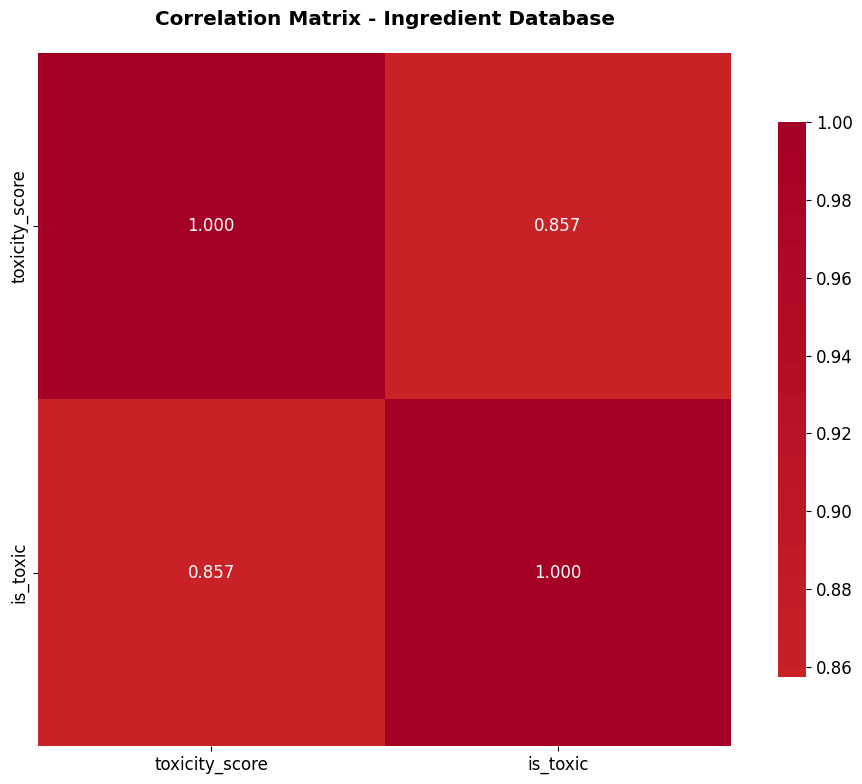


📊 Correlation Matrix:
                toxicity_score  is_toxic
toxicity_score         1.00000   0.85746
is_toxic               0.85746   1.00000


In [7]:
# Correlation analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 30)

# Select numeric columns for correlation
numeric_cols = ingredient_db.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")

if len(numeric_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = ingredient_db[numeric_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix - Ingredient Database', fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(REPORTS / 'correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n📊 Correlation Matrix:")
    print(corr_matrix)
else:
    print("⚠️ Not enough numeric columns for correlation analysis")

In [8]:
# Analyze food datasets if available
if food_df is not None:
    print("🍎 FOOD DATASET ANALYSIS")
    print("=" * 40)
    
    # Basic info
    print(f"\n📊 Food Dataset Shape: {food_df.shape}")
    print(f"Columns: {list(food_df.columns)}")
    
    # First few rows
    print("\n🔍 First 5 rows:")
    display(food_df.head())
    
    # Data types and missing values
    print("\n🏷️ Data Info:")
    print(food_df.info())
    
    # Missing values analysis
    missing_food = food_df.isnull().sum()
    if missing_food.sum() > 0:
        print("\n❓ Missing Values:")
        missing_pct = (missing_food / len(food_df)) * 100
        missing_df = pd.DataFrame({
            'Missing Count': missing_food[missing_food > 0],
            'Missing %': missing_pct[missing_food > 0]
        })
        print(missing_df)
    
    # Numeric columns analysis
    numeric_food_cols = food_df.select_dtypes(include=[np.number]).columns
    if len(numeric_food_cols) > 0:
        print(f"\n📈 Numeric columns: {list(numeric_food_cols)}")
        print("\nSummary Statistics:")
        display(food_df[numeric_food_cols].describe())
else:
    print("⚠️ Food dataset not available for analysis")

🍎 FOOD DATASET ANALYSIS

📊 Food Dataset Shape: (7413, 48)
Columns: ['Category', 'Description', 'Nutrient Data Bank Number', 'Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber', 'Data.Kilocalories', 'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Manganese', 'Data.Niacin', 'Data.Pantothenic Acid', 'Data.Protein', 'Data.Refuse Percentage', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid', 'Data.Household Weights.1st Household Weight', 'Data.Household Weights.1st Household Weight Description', 'Data.Household Weights.2nd Household Weight', 'Data.Household Weights.2nd Household Weight Description', 'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium', 'Data.M

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5



🏷️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Choleste

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,...,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000
mean,14116.443680,21.210711,1.852459,159.043437,8.776744,21.785381,37.162822,20.673546,1.993147,219.655875,...,268.348172,331.590719,1.875125,767.568191,99.437070,1.172903,0.269547,9.075651,0.842837,9.448604
std,8767.416214,269.714183,2.993228,1126.285026,154.184860,27.123491,119.738438,45.481990,4.292873,171.668713,...,404.916220,977.046544,4.193682,3871.307652,761.653061,4.512816,0.565116,63.443284,4.169756,66.067619
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8121.000000,0.000000,0.830000,0.000000,0.000000,0.490000,0.000000,0.000000,0.000000,82.000000,...,103.000000,31.000000,0.190000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
50%,12539.000000,0.000000,1.240000,0.000000,0.000000,9.290000,2.000000,0.000000,0.300000,181.000000,...,210.000000,86.000000,0.770000,33.000000,0.000000,0.010000,0.110000,0.000000,0.050000,0.000000
75%,18424.000000,0.000000,2.200000,1.000000,0.000000,30.590000,60.000000,20.000000,2.300000,331.000000,...,328.000000,428.000000,2.460000,280.000000,24.000000,0.830000,0.330000,3.500000,0.390000,1.700000
max,93600.000000,14251.000000,99.800000,42891.000000,7923.000000,100.000000,3100.000000,1388.000000,79.000000,902.000000,...,16500.000000,38758.000000,181.610000,100000.000000,30000.000000,98.890000,12.000000,2400.000000,149.400000,1714.500000


In [9]:
# Statistical insights and patterns
print("📈 STATISTICAL INSIGHTS")
print("=" * 35)

# Toxicity statistics by category
print("\n🏷️ Toxicity Statistics by Category:")
category_stats = ingredient_db.groupby('category')['toxicity_score'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
category_stats = category_stats.sort_values('mean', ascending=False)
print(category_stats)

# Risk level statistics
print("\n⚠️ Risk Level Statistics:")
risk_stats = ingredient_db.groupby('risk_level')['toxicity_score'].agg([
    'count', 'mean', 'min', 'max'
]).round(2)
print(risk_stats)

# Most and least toxic ingredients
print("\n🔴 TOP 5 MOST TOXIC INGREDIENTS:")
most_toxic = ingredient_db.nlargest(5, 'toxicity_score')[['ingredient_name', 'toxicity_score', 'category', 'health_impact']]
for idx, row in most_toxic.iterrows():
    print(f"  {row['ingredient_name']}: {row['toxicity_score']} ({row['category']}, {row['health_impact']})")

print("\n🟢 TOP 5 SAFEST INGREDIENTS:")
safest = ingredient_db.nsmallest(5, 'toxicity_score')[['ingredient_name', 'toxicity_score', 'category', 'health_impact']]
for idx, row in safest.iterrows():
    print(f"  {row['ingredient_name']}: {row['toxicity_score']} ({row['category']}, {row['health_impact']})")

📈 STATISTICAL INSIGHTS

🏷️ Toxicity Statistics by Category:
                 count   mean  median    std  min  max
category                                              
flavor_enhancer      1  85.00    85.0    NaN   85   85
additive             1  75.00    75.0    NaN   75   75
sweetener            4  72.50    72.5  15.55   55   90
flour_treatment      1  70.00    70.0    NaN   70   70
preservative         8  65.00    67.5  21.38   40   90
emulsifier           2  40.00    40.0   7.07   35   45
thickener            7  32.86    30.0  12.20   20   50
fat                  3  31.67     0.0  54.85    0   95
flavor               2  30.00    30.0  14.14   20   40
protein              1  20.00    20.0    NaN   20   20
leavening            2  20.00    20.0   0.00   20   20
vitamin              2   5.00     5.0   0.00    5    5
mineral              2   0.00     0.0   0.00    0    0
macronutrient        1   0.00     0.0    NaN    0    0
spice                1   0.00     0.0    NaN    0    0
grain

In [10]:
# Data quality assessment
print("✅ DATA QUALITY ASSESSMENT")
print("=" * 40)

# Check for duplicates
duplicates = ingredient_db.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

# Check for outliers in toxicity scores
Q1 = ingredient_db['toxicity_score'].quantile(0.25)
Q3 = ingredient_db['toxicity_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ingredient_db[
    (ingredient_db['toxicity_score'] < lower_bound) | 
    (ingredient_db['toxicity_score'] > upper_bound)
]

print(f"\n📊 Outliers in toxicity scores: {len(outliers)}")
if len(outliers) > 0:
    print("Outlier ingredients:")
    for idx, row in outliers.iterrows():
        print(f"  {row['ingredient_name']}: {row['toxicity_score']}")

# Data completeness
completeness = (1 - ingredient_db.isnull().sum() / len(ingredient_db)) * 100
print(f"\n📋 Data Completeness:")
for col, pct in completeness.items():
    print(f"  {col}: {pct:.1f}%")

# Overall data quality score
avg_completeness = completeness.mean()
quality_score = avg_completeness * (1 - duplicates/len(ingredient_db))
print(f"\n🎯 Overall Data Quality Score: {quality_score:.1f}%")

✅ DATA QUALITY ASSESSMENT

🔄 Duplicate rows: 0

📊 Outliers in toxicity scores: 0

📋 Data Completeness:
  ingredient_name: 100.0%
  toxicity_score: 100.0%
  category: 100.0%
  health_impact: 100.0%
  allergen_risk: 100.0%
  is_toxic: 100.0%
  risk_level: 80.0%

🎯 Overall Data Quality Score: 97.1%


In [11]:
# Generate EDA summary report
print("📋 EDA SUMMARY REPORT")
print("=" * 30)

summary_report = {
    'Dataset Info': {
        'Total Ingredients': len(ingredient_db),
        'Features': len(ingredient_db.columns),
        'Numeric Features': len(ingredient_db.select_dtypes(include=[np.number]).columns),
        'Categorical Features': len(ingredient_db.select_dtypes(include=['object']).columns)
    },
    'Toxicity Analysis': {
        'Mean Toxicity Score': ingredient_db['toxicity_score'].mean(),
        'Median Toxicity Score': ingredient_db['toxicity_score'].median(),
        'Std Deviation': ingredient_db['toxicity_score'].std(),
        'High Risk Ingredients': len(ingredient_db[ingredient_db['risk_level'] == 'High Risk']),
        'Safe Ingredients': len(ingredient_db[ingredient_db['risk_level'] == 'Safe'])
    },
    'Data Quality': {
        'Missing Values': ingredient_db.isnull().sum().sum(),
        'Duplicate Rows': duplicates,
        'Outliers': len(outliers),
        'Quality Score': f"{quality_score:.1f}%"
    }
}

for section, metrics in summary_report.items():
    print(f"\n📊 {section}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric}: {value:.2f}")
        else:
            print(f"  {metric}: {value}")

# Save summary to file
import json
with open(REPORTS.parent / 'eda_summary_report.json', 'w') as f:
    json.dump(summary_report, f, indent=2, default=str)

print("\n💾 EDA summary report saved to reports/eda_summary_report.json")
print("\n🎉 Week 3 EDA Analysis Complete!")
print("\n📋 Next Steps (Week 4):")
print("  1. Data preprocessing and cleaning")
print("  2. Feature engineering")
print("  3. Data splitting for ML")
print("  4. Model development preparation")

📋 EDA SUMMARY REPORT

📊 Dataset Info:
  Total Ingredients: 40
  Features: 7
  Numeric Features: 2
  Categorical Features: 5

📊 Toxicity Analysis:
  Mean Toxicity Score: 39.38
  Median Toxicity Score: 37.50
  Std Deviation: 31.40
  High Risk Ingredients: 9
  Safe Ingredients: 7

📊 Data Quality:
  Missing Values: 8
  Duplicate Rows: 0
  Outliers: 0
  Quality Score: 97.1%

💾 EDA summary report saved to reports/eda_summary_report.json

🎉 Week 3 EDA Analysis Complete!

📋 Next Steps (Week 4):
  1. Data preprocessing and cleaning
  2. Feature engineering
  3. Data splitting for ML
  4. Model development preparation
